In [486]:
!pip install feature_engine

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


##Importing dependencies



In [487]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from feature_engine.selection import RecursiveFeatureElimination
import pickle

##Exploratory Data Analysis

In [488]:
#loading and reading csv file using pandas, which converts it to a Data Frame
df = pd.read_csv("/content/1.csv")
#converting to pandas dataframe for more operations


In [449]:
#to show Some information about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 26 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   Auxiliary Boilers A/B Feed Water Header Pressure 2  10000 non-null  float64
 1   Auxiliary Boilers Feed Water Header Pressure        10000 non-null  float64
 2   Heat Recovery System Header Mass Flow               10000 non-null  float64
 3   Heat Recovery System Header Mass Flow.1             10000 non-null  float64
 4   Heat Recovery System Header Pressure                10000 non-null  float64
 5   Heat Recovery System Header Pressure.1              10000 non-null  float64
 6   Lube Oil Cooler Outlet Temperature                  10000 non-null  float64
 7   Lube Oil Tank Temperature                           10000 non-null  float64
 8   Motor Current Phase A                               10000 non-null  float64
 

In [450]:
df.head()

,Auxiliary Boilers A/B Feed Water Header Pressure 2,Auxiliary Boilers Feed Water Header Pressure,Heat Recovery System Header Mass Flow,Heat Recovery System Header Mass Flow.1,Heat Recovery System Header Pressure,Heat Recovery System Header Pressure.1,Lube Oil Cooler Outlet Temperature,Lube Oil Tank Temperature,Motor Current Phase A,Motor Current Phase B,...,Pump Journal 1 Bearing Temperature,Pump Journal 2 Bearing Temperature,Pump Shaft Speed,Pump Suction Pressure 1,Pump Suction Pressure 2,Pump Suction Strainer Differential Pressure,Pump Suction Temperature,Pump Thrust Bearing Temperature 1,Pump Thrust Bearing Temperature 2,Pump Radial Bearing Vibration
0,1305.491089,1305.893799,301258.6563,304479.0625,1779.438599,1782.647461,71.223015,76.965309,145.308487,145.308487,...,137.135651,144.300110,3589.281494,24.951010,16.886732,0.272720,226.743881,98.050789,86.571556,9.661202
1,1301.227783,1299.925171,303027.7500,303782.2813,1779.364014,1782.624756,71.215706,76.948776,145.000000,146.000000,...,137.133484,144.299057,3589.281982,25.042177,16.886147,0.272987,226.743118,98.054756,86.565018,9.655985
2,1296.178589,1294.646606,301878.9688,303518.4375,1779.289551,1782.602173,71.208389,76.932243,146.306839,146.613678,...,137.131317,144.298004,3589.282715,25.012571,16.885561,0.273254,226.742371,98.058716,86.558487,9.650768
3,1297.628296,1299.988770,302023.0625,303576.3750,1779.214966,1782.579468,71.201080,76.912827,146.000000,146.301178,...,137.129150,144.296936,3589.283203,25.009590,16.884975,0.273521,226.741623,98.062683,86.551956,9.645551
4,1299.078003,1300.749023,301972.0625,303999.5313,1779.140381,1782.556885,71.193764,76.892960,146.305389,147.000000,...,137.126968,144.295883,3589.283691,25.006611,16.884392,0.273788,226.740860,98.066650,86.545425,9.642216


In [451]:
len(df)   

10000

###Dropping the column if they have NaN values more than 95%

In [489]:
#checking for any column name with Nan Values
[i for i in df.columns if df[i].isnull().any()]

['Motor Input Power', 'Motor Power Factor']

In [490]:

# by using for loop
"""for i in df.columns:
  if df[i].isnull().sum() ==0.95*len(df):
    df.drop(i, axis=1, inplace=True) """
#by using List Comprehension
[(df.drop(i, axis=1, inplace=True)) for i in df.columns if df[i].isnull().sum() >0.95*len(df)]

[None, None]

In [491]:
#2 columns dropped
len(df.columns)

24


#Model Building

Defining Predictor variable and target variable i.e input_features and target_feature

In [492]:
#Predictor features
X = df.drop('Pump Radial Bearing Vibration',axis=1)
#Feature to predict
y = df['Pump Radial Bearing Vibration']

##Splitting the data into train and test sets

In [493]:

X_train, X_test, y_train, y_test = train_test_split(X,y, train_size=0.8)

print(X_train.shape), print(y_train.shape)

print(X_test.shape), print(y_test.shape)

(8000, 23)
(8000,)
(2000, 23)
(2000,)


(None, None)

Selecting and building with a basic model

In [494]:
model = LinearRegression()
model.fit(X_train,y_train)
score = model.score(X_train,y_train)

# score returns the coefficient of determination of the prediction (i.e R²).
score

0.6526554413076371

Making predictions on test set




In [495]:
y_pred = model.predict(X_test)
np.sqrt(mean_squared_error(y_test, y_pred))


0.1628656351046719

##Feature Engineering and Building the model again

In [496]:
df.columns

Index(['Auxiliary Boilers A/B Feed Water Header Pressure 2',
       'Auxiliary Boilers Feed Water Header Pressure',
       'Heat Recovery System Header Mass Flow',
       'Heat Recovery System Header Mass Flow.1',
       'Heat Recovery System Header Pressure',
       'Heat Recovery System Header Pressure.1',
       'Lube Oil Cooler Outlet Temperature', 'Lube Oil Tank Temperature',
       'Motor Current Phase A', 'Motor Current Phase B',
       'Motor Current Phase C', 'Motor Voltage', 'Pump Discharge Pressure',
       'Pump Discharge Volumetric Flow', 'Pump Journal 1 Bearing Temperature',
       'Pump Journal 2 Bearing Temperature', 'Pump Shaft Speed',
       'Pump Suction Pressure 1', 'Pump Suction Pressure 2',
       'Pump Suction Strainer Differential Pressure',
       'Pump Suction Temperature', 'Pump Thrust Bearing Temperature 1',
       'Pump Thrust Bearing Temperature 2', 'Pump Radial Bearing Vibration'],
      dtype='object')

Adding and Dropping specific features to improve score

In [497]:
#df['Pump Journal Bearing Temperature'] = df['Pump Journal 1 Bearing Temperature'] + df['Pump Journal 2 Bearing Temperature']
df['Total Heat Recovery System Header Mass Flow'] = df['Heat Recovery System Header Mass Flow'] + df['Heat Recovery System Header Mass Flow.1']
df['Pump Suction Pressure'] = df['Pump Suction Pressure 1'] + df['Pump Suction Pressure 2']
DF = df.drop(['Heat Recovery System Header Mass Flow','Heat Recovery System Header Mass Flow.1'],axis =1)


In [498]:
DF.columns

Index(['Auxiliary Boilers A/B Feed Water Header Pressure 2',
       'Auxiliary Boilers Feed Water Header Pressure',
       'Heat Recovery System Header Pressure',
       'Heat Recovery System Header Pressure.1',
       'Lube Oil Cooler Outlet Temperature', 'Lube Oil Tank Temperature',
       'Motor Current Phase A', 'Motor Current Phase B',
       'Motor Current Phase C', 'Motor Voltage', 'Pump Discharge Pressure',
       'Pump Discharge Volumetric Flow', 'Pump Journal 1 Bearing Temperature',
       'Pump Journal 2 Bearing Temperature', 'Pump Shaft Speed',
       'Pump Suction Pressure 1', 'Pump Suction Pressure 2',
       'Pump Suction Strainer Differential Pressure',
       'Pump Suction Temperature', 'Pump Thrust Bearing Temperature 1',
       'Pump Thrust Bearing Temperature 2', 'Pump Radial Bearing Vibration',
       'Total Heat Recovery System Header Mass Flow', 'Pump Suction Pressure'],
      dtype='object')

In [499]:
#Predictor features
X = DF.drop('Pump Radial Bearing Vibration',axis=1)
#Feature to predict
y = DF['Pump Radial Bearing Vibration']


In [500]:
X_train, X_test, y_train, y_test = train_test_split(X,y, train_size=0.8)

print(X_train.shape), print(y_train.shape)

print(X_test.shape), print(y_test.shape)

(8000, 23)
(8000,)
(2000, 23)
(2000,)


(None, None)

In [501]:
model = LinearRegression()
model.fit(X_train,y_train)
pickle.dump(model, open("Basic_Linear_model.pkl", 'wb'))


score = model.score(X_train,y_train)
# score returns the coefficient of determination of the prediction (i.e R²).
score

0.6615749235956578

##Feature Importance and Performance Check 

In [466]:
# build initial model using all the features
model = LinearRegression()
# Setup the RFE selector

sel = RecursiveFeatureElimination(
    variables=None, # automatically evaluate all numerical variables
    estimator = model, # the ML model
    scoring = 'r2', # the metric we want to evalute
    threshold = 0.001 , # the maximum performance drop allowed to remove a feature
    cv=5, # cross-validation
)

# this may take quite a while, because
# we are building a lot of models with cross-validation
#x = df_all3.iloc[0:1460, :]

sel.fit(X, y)

RecursiveFeatureElimination(cv=5, estimator=LinearRegression(), scoring='r2',
                            threshold=0.001)

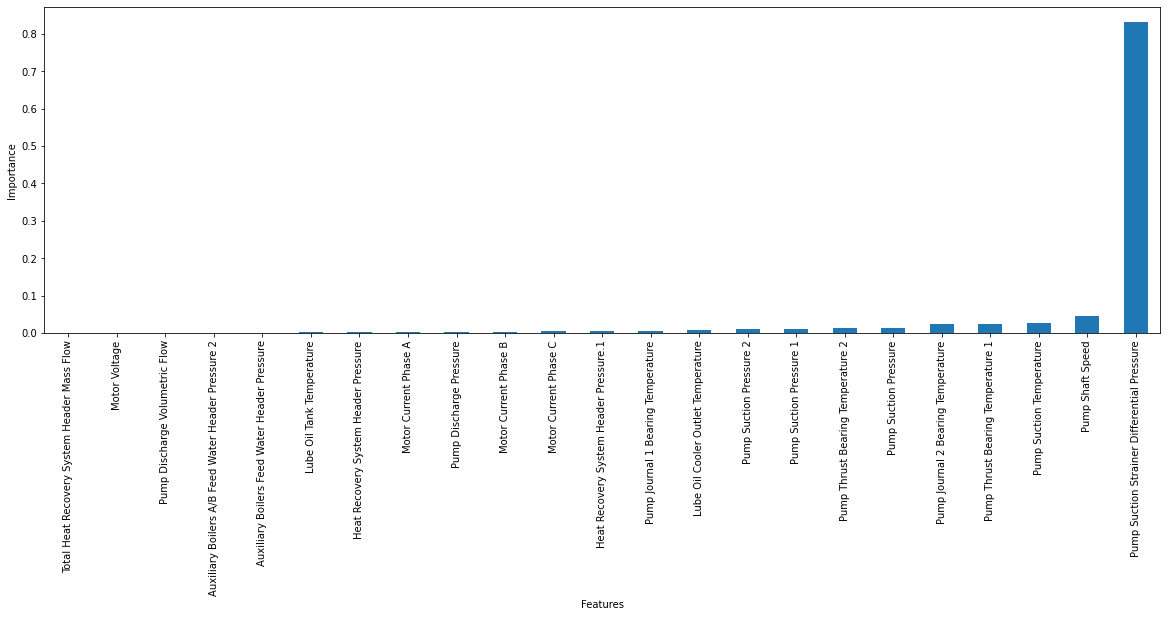

In [467]:
sel.feature_importances_.plot.bar(figsize=(20,6))
plt.xlabel('Features')
plt.ylabel('Importance')
plt.show()

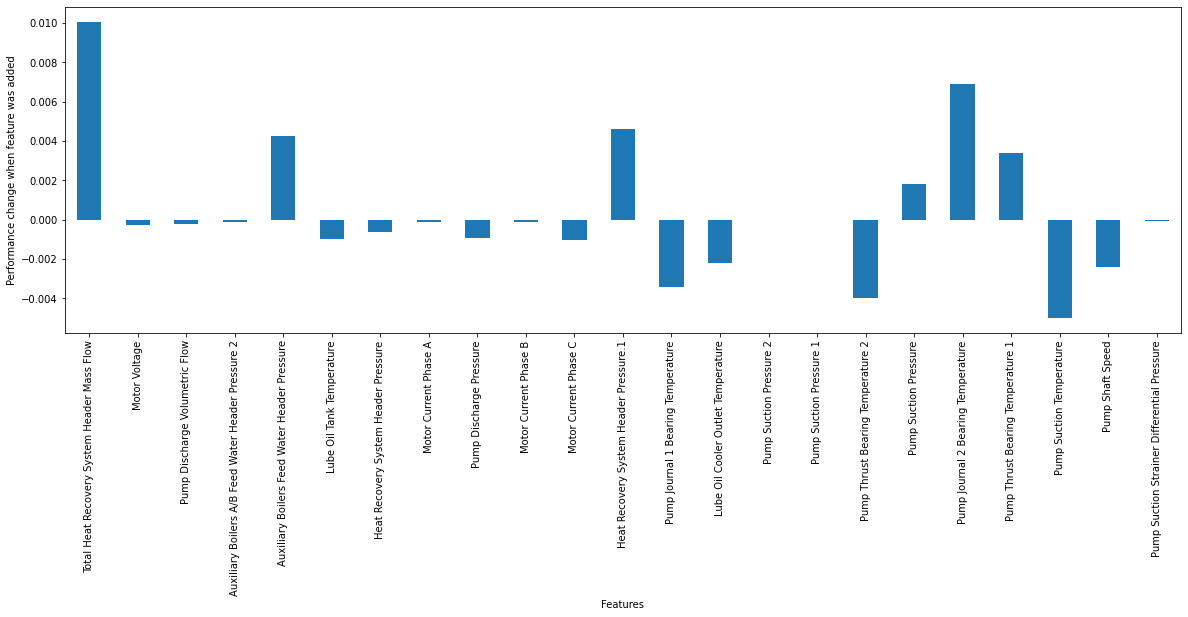

In [468]:
pd.Series(sel.performance_drifts_).plot.bar(figsize=(20,6))
plt.xlabel('Features')
plt.ylabel('Performance change when feature was added')
plt.show()

Visualisations

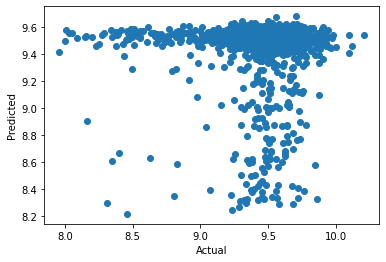

In [469]:
import matplotlib.pyplot as plt
plt.scatter(y_test,y_pred);
plt.xlabel('Actual');
plt.ylabel('Predicted');

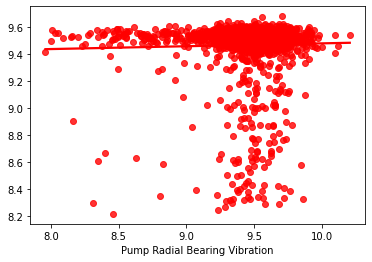

In [470]:
import seaborn as sns
sns.regplot(x=y_test,y=y_pred,ci=None,color ='red');

##PCA (dimensionality reduction algorithm)

0.07414509951849099


0.02633175805873624

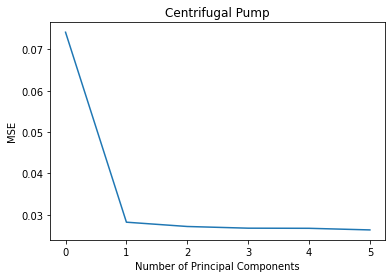

In [471]:
from sklearn.model_selection import RepeatedKFold, cross_val_score
#Predictor features
X = DF.drop('Pump Radial Bearing Vibration',axis=1)
#Feature to predict
y = DF['Pump Radial Bearing Vibration']


pca = PCA(n_components=8)
X_reduced = pca.fit_transform(scale(X))

#define cross validation method
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)

regr = LinearRegression()
mse = []

# Calculate MSE with only the intercept
score = -1*cross_val_score(regr,
           np.ones((len(X_reduced),1)), y, cv=cv,
           scoring='neg_mean_squared_error').mean()    
mse.append(score)
print(score)
# Calculate MSE using cross-validation, adding one component at a time
for i in np.arange(1, 6):
    score = -1*cross_val_score(regr,
               X_reduced[:,:i], y, cv=cv, scoring='neg_mean_squared_error').mean()
    mse.append(score)
  
    
# Plot cross-validation results    
plt.plot(mse)
plt.xlabel('Number of Principal Components')
plt.ylabel('MSE')
plt.title('Centrifugal Pump')
score

In [472]:
mse

[0.07414509951849099,
 0.028200385455671335,
 0.02716028465821723,
 0.02675206454800375,
 0.026721598125417415,
 0.02633175805873624]

In [473]:
#This means 97.07% of the variance in data can be explained by 8 principal components (rather than 100% with 23 components)
a =np.cumsum(np.round(pca.explained_variance_ratio_, decimals=4)*100)
a

array([40.53, 66.29, 75.79, 82.73, 89.16, 93.02, 95.34, 97.07])

Building model for prediction score on reduced dataset (from PCA)

In [474]:
from sklearn.metrics import mean_squared_error
#split the dataset into training (70%) and testing (30%) sets
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=0) 

#scale the training and testing data
X_reduced_train = pca.fit_transform(scale(X_train))
X_reduced_test = pca.transform(scale(X_test))[:,:1]

#train PCR model on training data 
regr = LinearRegression()
regr.fit(X_reduced_train[:,:1], y_train)
score = regr.score(X_reduced_train[:,:1],y_train)

#calculate Root Mean Squared Error (RMSE)
pred = regr.predict(X_reduced_test)
np.sqrt(mean_squared_error(y_test, pred))
score

0.6106171679609298

Visualisations after PCA

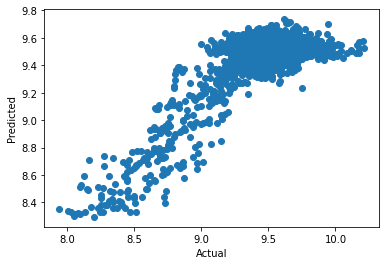

In [475]:
import matplotlib.pyplot as plt
plt.scatter(y_test,pred);
plt.xlabel('Actual');
plt.ylabel('Predicted');

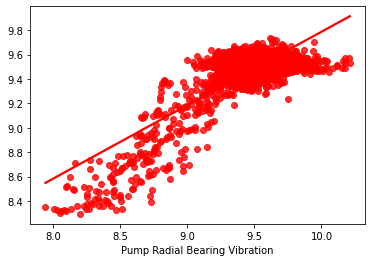

In [476]:
import seaborn as sns
sns.regplot(x=y_test,y=pred,ci=None,color ='red');